In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data.csv")

print("Shape:", df.shape)
df.head()


Shape: (20000, 15)


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [2]:
df.shape

(20000, 15)

In [3]:
df.isnull().sum()


subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [5]:
df["text"] = df["subject"] + " " + df["body"]
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,text
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN,Unvorhergesehener Absturz der Datenanalyse-Pla...
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN,Customer Support Inquiry Seeking information o...
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN,Data Analytics for Investment I am contacting ...
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN,Krankenhaus-Dienstleistung-Problem Ein Medien-...
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN,"Security Dear Customer Support, I am reaching ..."


In [6]:
df = df.dropna(subset=["text", "type", "tag_1","tag_2","tag_3","tag_4","tag_5","tag_6","tag_7","tag_8"])

In [7]:
df.isnull().sum()

subject     0
body        0
answer      0
type        0
queue       0
priority    0
language    0
tag_1       0
tag_2       0
tag_3       0
tag_4       0
tag_5       0
tag_6       0
tag_7       0
tag_8       0
text        0
dtype: int64

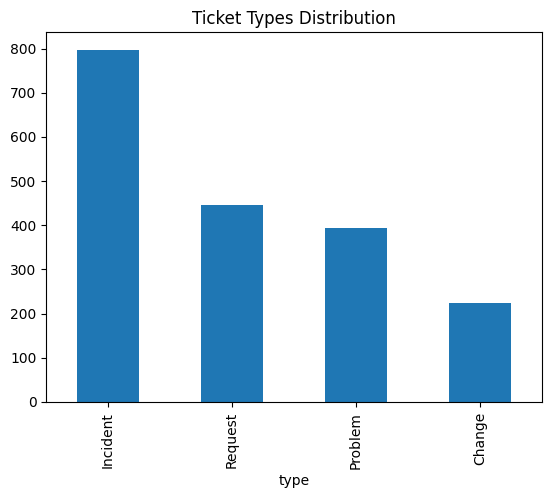

In [8]:
df["type"].value_counts().plot(kind="bar")
plt.title("Ticket Types Distribution")
plt.show()


Moyenne longueur: 585.8601398601398


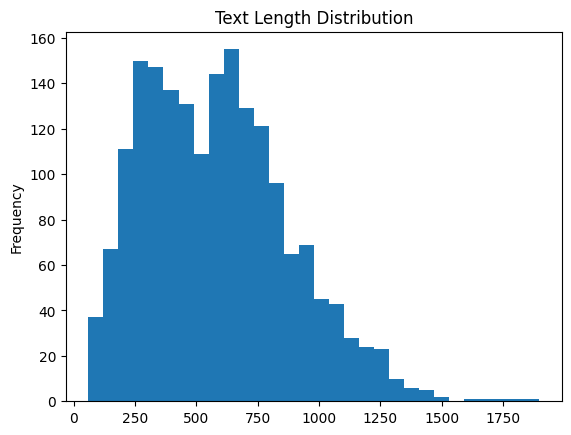

In [9]:
df["length"] = df["text"].apply(len)

print("Moyenne longueur:", df["length"].mean())

df["length"].plot(kind="hist", bins=30)
plt.title("Text Length Distribution")
plt.show()
